<a href="https://colab.research.google.com/github/ZakiLazuardi987/PCVK_Ganjil_2024/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


 Gamma Correction pada citra 
------------------------------------------
Masukkan nilai Gamma: 3


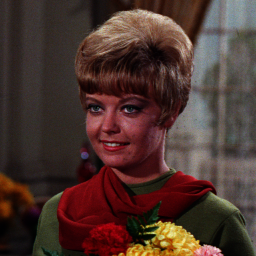

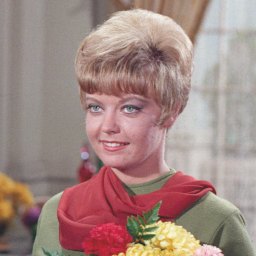

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Meminta masukan nilai gamma dari pengguna
print(' Gamma Correction pada citra ')
print('------------------------------------------')
try:
    gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')
    gamma = 1.0

# Fungsi untuk melakukan gamma correction
def apply_gamma_correction(image, gamma):
    # Membuat tabel look-up untuk setiap nilai pixel (0-255)
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")

    # Menerapkan tabel look-up ke gambar
    return cv2.LUT(image, table)

# Membaca gambar menggunakan OpenCV
image = cv2.imread('/content/drive/MyDrive/Tugas PCVK/Images/female.tiff')

# Melakukan gamma correction
corrected_image = apply_gamma_correction(image, gamma)

# Menampilkan hasil sebelum dan sesudah gamma correction
cv2_imshow(image)
cv2_imshow(corrected_image)

Simulasi Image Depth (Kuantisasi Citra)
------------------------------------------


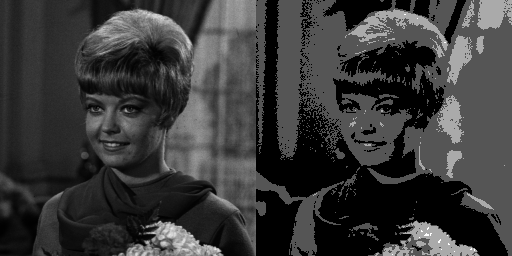

In [13]:
# Meminta masukan kedalaman bit dari pengguna
print("Simulasi Image Depth (Kuantisasi Citra)")
print("------------------------------------------")

bit_depth = 2

# Menghitung level kuantisasi berdasarkan bit depth
level = 255 / (pow(2, bit_depth) - 1)

# Membaca citra grayscale
original = cv2.imread('/content/drive/MyDrive/Tugas PCVK/Images/female.tiff', cv2.IMREAD_GRAYSCALE)

# Membuat array kosong untuk hasil depth image
depth_image = np.zeros(original.shape, original.dtype)

# Proses kuantisasi citra
for i in range(original.shape[0]):
    for j in range(original.shape[1]):
        # Mengelompokkan pixel ke dalam level yang sesuai
        depth_image[i, j] = np.round(original[i, j] / level) * level

# Menampilkan citra asli dan citra hasil kuantisasi secara horizontal
combined_image = cv2.hconcat([original, depth_image])

# Menampilkan hasil citra asli dan citra kuantisasi
cv2_imshow( combined_image)


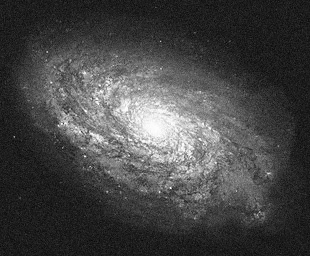

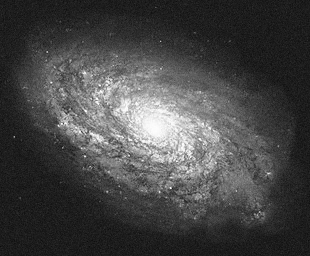

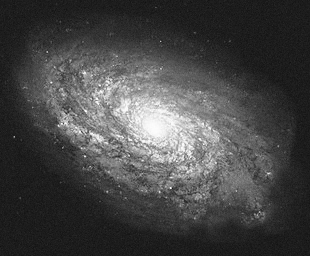

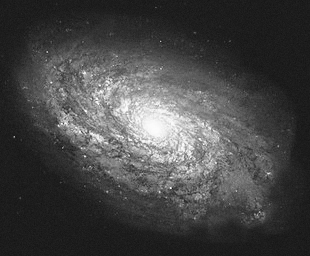

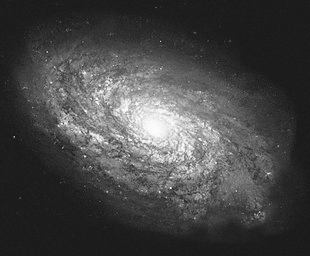

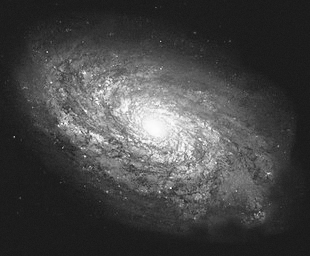

No	Jumlah Citra di Average	PSNR (dB)
1	5			27.54 dB
2	10			27.55 dB
3	20			27.50 dB
4	40			27.46 dB
5	80			27.39 dB
6	100			27.36 dB


In [15]:
import cv2 as cv
import numpy as np
import glob
import os

# Fungsi untuk menghitung PSNR
def calculate_psnr(original, denoised):
    mse = np.mean((original - denoised) ** 2)
    if mse == 0:
        return float('inf')  # Jika tidak ada perbedaan, PSNR infinity
    psnr = 20 * np.log10(255.0 / np.sqrt(mse))
    return psnr

# Membaca citra asli (tanpa noise)
original_image = cv.imread('/content/drive/MyDrive/Tugas PCVK/Images/galaxy.jpg', cv.IMREAD_GRAYSCALE)

# Membaca semua citra noisy menggunakan glob
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Tugas PCVK/Images/noises/*.jpg'):
    n = cv.imread(img, cv.IMREAD_GRAYSCALE)
    cv_img.append(n)

# Fungsi untuk melakukan average denoising
def average_denoising(num_images):
    # Inisialisasi array untuk menyimpan hasil penjumlahan pixel
    average_image = np.zeros_like(cv_img[0], dtype=np.float64)

    # Melakukan penjumlahan pixel dari sejumlah gambar noisy
    for i in range(num_images):
        average_image += cv_img[i]

    # Membagi dengan jumlah gambar untuk menghitung rata-rata
    average_image /= num_images

    # Mengkonversi ke tipe data uint8 agar bisa ditampilkan sebagai gambar
    return np.uint8(average_image)

# Daftar jumlah citra yang akan digunakan untuk average denoising
image_counts = [5, 10, 20, 40, 80, 100]

# Menyimpan hasil PSNR untuk setiap jumlah citra yang diolah
psnr_results = []

# Proses denoising dan menghitung PSNR
for count in image_counts:
    denoised_image = average_denoising(count)

    # Menghitung PSNR
    psnr_value = calculate_psnr(original_image, denoised_image)
    psnr_results.append((count, psnr_value))

    # Menampilkan gambar hasil denoising
    cv2_imshow(denoised_image)

# Cetak hasil PSNR
print("No\tJumlah Citra di Average\tPSNR (dB)")
for i, (count, psnr_value) in enumerate(psnr_results, 1):
    print(f"{i}\t{count}\t\t\t{psnr_value:.2f} dB")


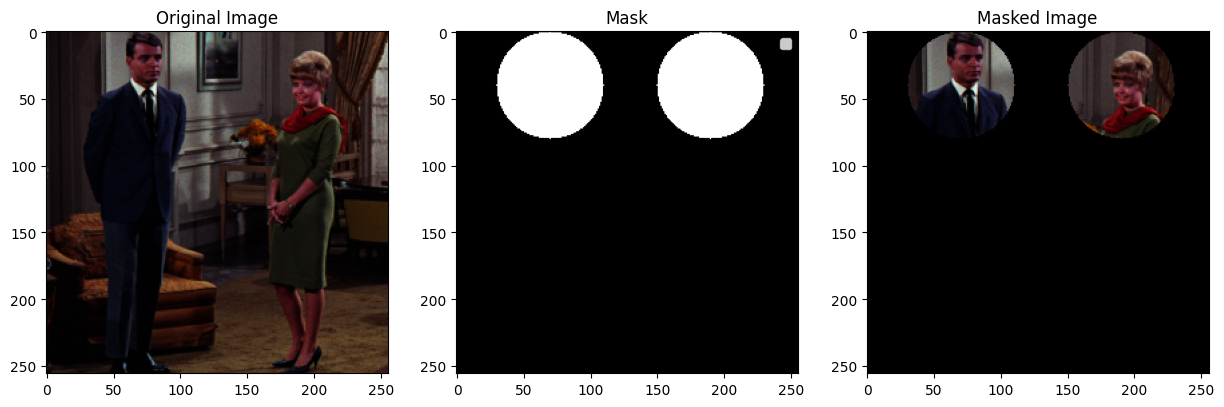

In [25]:
import matplotlib.pyplot as plt

# Membaca gambar asli
image = cv.imread('/content/drive/MyDrive/Tugas PCVK/Images/couple.tiff')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)  # Convert BGR to RGB untuk tampil di matplotlib

# Membuat mask kosong (berwarna hitam) dengan ukuran yang sama seperti gambar asli
mask = np.zeros(image.shape[:2], dtype="uint8")

# Mendefinisikan dua lingkaran pada mask
# Lingkaran pertama
circle1_center = (190, 40)  # Titik pusat lingkaran pertama
circle1_radius = 40  # Jari-jari lingkaran pertama
cv.circle(mask, circle1_center, circle1_radius, 255, -1)  # (titik pusat, jari-jari, warna putih (255), fill area (-1))

# Lingkaran kedua
circle2_center = (70, 40)  # Titik pusat lingkaran kedua
circle2_radius = 40  # Jari-jari lingkaran kedua
cv.circle(mask, circle2_center, circle2_radius, 255, -1)

# Terapkan mask pada gambar dengan operasi logika AND
masked_image = cv.bitwise_and(image_rgb, image_rgb, mask=mask)

# Menampilkan gambar asli, mask, dan hasil masked image menggunakan Matplotlib
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Gambar asli
ax[0].imshow(image_rgb)
ax[0].set_title("Original Image")
ax[0].axis("on")

# Mask dengan lingkaran
ax[1].imshow(mask, cmap='gray')
ax[1].set_title("Mask")
ax[1].legend(loc='upper right')

# Gambar hasil masking
ax[2].imshow(masked_image)
ax[2].set_title("Masked Image")
ax[2].axis("on")

# Tampilkan plot
plt.show()


(-0.5, 255.5, 255.5, -0.5)

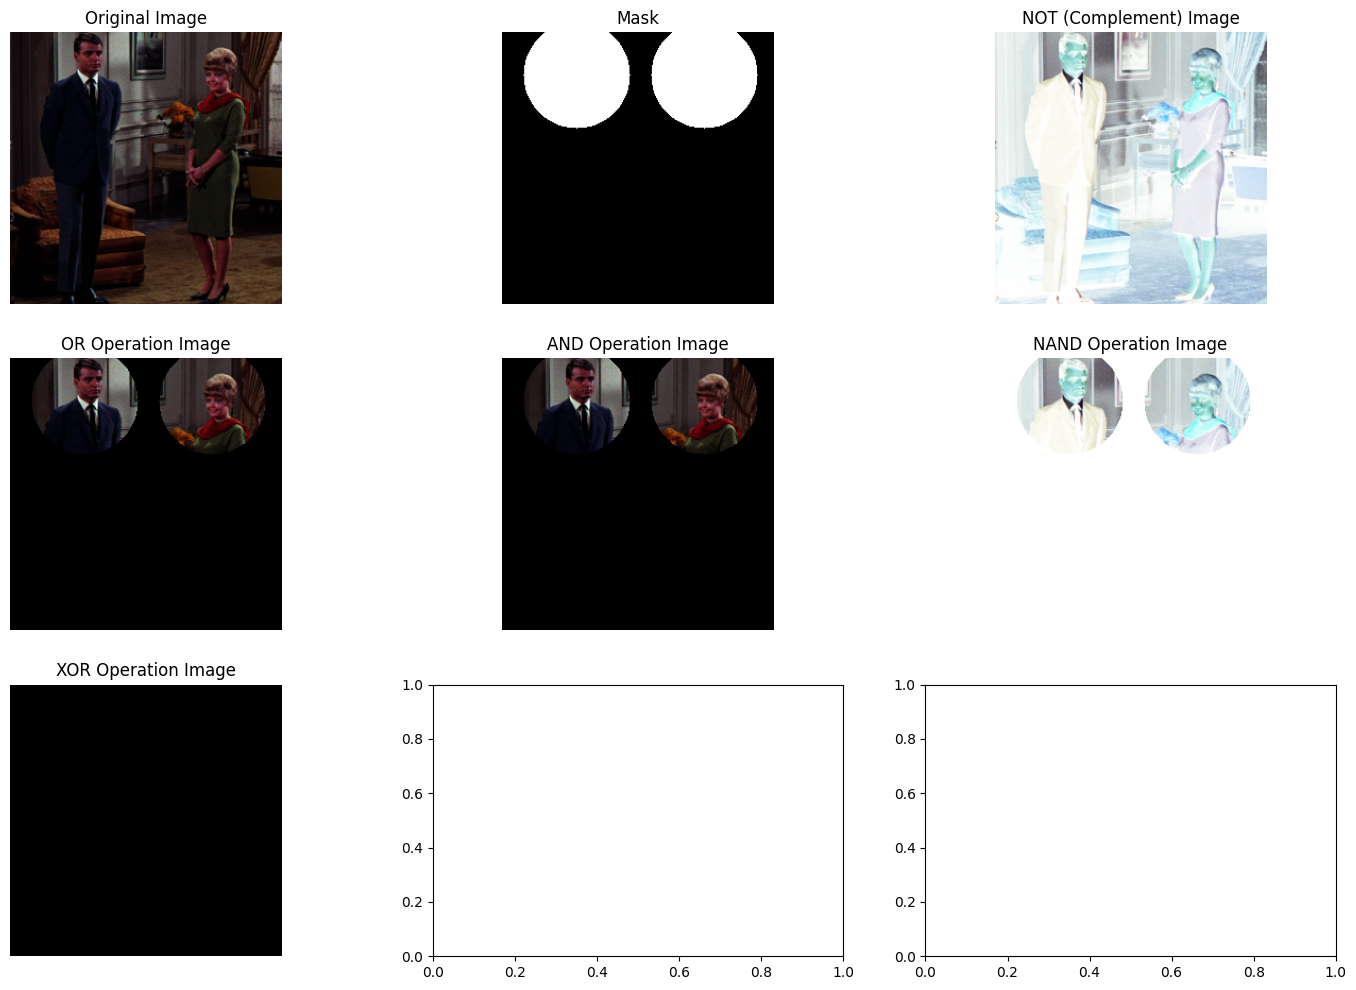

In [29]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar asli
image = cv.imread('/content/drive/MyDrive/Tugas PCVK/Images/couple.tiff')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)  # Convert BGR to RGB untuk tampil di matplotlib

# Membuat mask kosong dengan lingkaran
mask = np.zeros(image.shape[:2], dtype="uint8")
cv.circle(mask, (190, 40), 50, 255, -1)
cv.circle(mask, (70, 40), 50, 255, -1)

# 1. NOT Operation
not_image = cv.bitwise_not(image_rgb)

# 2. OR Operation
or_image = cv.bitwise_or(image_rgb, image_rgb, mask=mask)

# 3. AND Operation
and_image = cv.bitwise_and(image_rgb, image_rgb, mask=mask)

# 4. NAND (Not And)
nand_image = cv.bitwise_not(and_image)

# 5. XOR (Exlusive Or)
xor_image = cv.bitwise_xor(image_rgb, image_rgb, mask=mask)

# Menampilkan hasil untuk setiap operasi logika
fig, ax = plt.subplots(3,3, figsize=(18, 12))

# Gambar asli
ax[0, 0].imshow(image_rgb)
ax[0, 0].set_title("Original Image")
ax[0, 0].axis("off")

# Mask
ax[0, 1].imshow(mask, cmap='gray')
ax[0, 1].set_title("Mask")
ax[0, 1].axis("off")

# NOT operation
ax[0, 2].imshow(not_image)
ax[0, 2].set_title("NOT (Complement) Image")
ax[0, 2].axis("off")

# OR operation
ax[1, 0].imshow(or_image)
ax[1, 0].set_title("OR Operation Image")
ax[1, 0].axis("off")

# AND operation
ax[1, 1].imshow(and_image)
ax[1, 1].set_title("AND Operation Image")
ax[1, 1].axis("off")

# NAND operation
ax[1, 2].imshow(nand_image)
ax[1, 2].set_title("NAND Operation Image")
ax[1, 2].axis("off")

# XOR operation
ax[2, 0].imshow(xor_image)
ax[2, 0].set_title("XOR Operation Image")
ax[2, 0].axis("off")
